In [1]:
import meep as mp
from matplotlib import pyplot as plt
import numpy as np
from IPython.display import Video
%matplotlib inline

In [8]:
cell = mp.Vector3(16, 16, 0)
geometry = [
    mp.Block(
        mp.Vector3(12, 1, mp.inf),
        center=mp.Vector3(-2.5, -3.5),
        material=mp.Medium(epsilon=12),
    ),
    mp.Block(
        mp.Vector3(1, 12, mp.inf),
        center=mp.Vector3(3.5, 2),
        material=mp.Medium(epsilon=12),
    ),
]
pml_layers = [mp.PML(1.0)]
resolution = 10

In [11]:
sources = [
    mp.Source(
        mp.ContinuousSource(wavelength=2 * (11**0.5), width=20),
        component=mp.Ez,
        center=mp.Vector3(-7, -3.5),
        size=mp.Vector3(0, 1),
    )
]

In [12]:
sim = mp.Simulation(
    cell_size=cell,
    boundary_layers=pml_layers,
    geometry=geometry,
    sources=sources,
    resolution=resolution,
)

     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,2,0)
          size (1,12,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


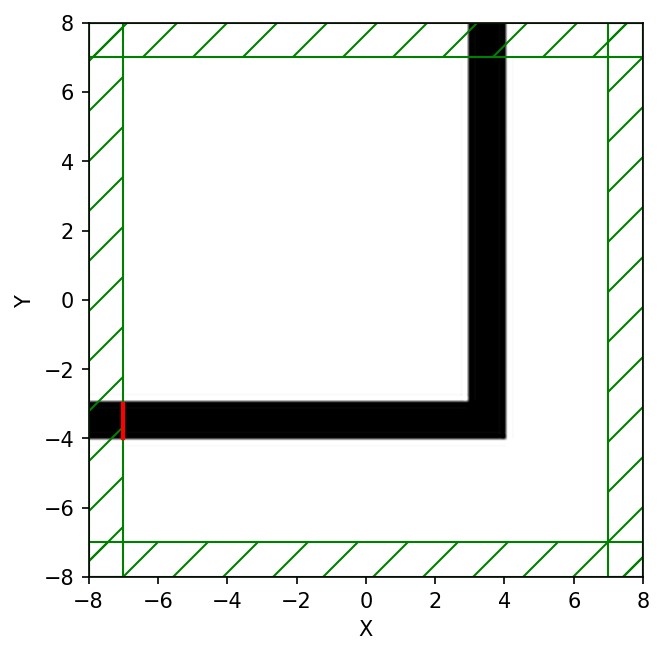

In [13]:
f = plt.figure(dpi=150)
sim.plot2D(ax=f.gca())
plt.show()

In [14]:
f = plt.figure(dpi=150)
Animate = mp.Animate2D(fields=mp.Ez, f=f, realtime=False, normalize=True)
sim.run(mp.at_every(0.5, Animate), until = 100)
plt.close()

-----------
Initializing structure...
time for choose_chunkdivision = 0.000423908 s
Working in 2D dimensions.
Computational cell is 16 x 16 x 0 with resolution 10
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,2,0)
          size (1,12,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.0252481 s
-----------
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,2,0)
          size (1,12,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
Normalizing field data...
run 0 finished at t = 100.0 (2000 timesteps)


In [15]:
filename = "media/bent_waveguide.mp4"
fps = 10
Animate.to_mp4(fps, filename)
Video(filename)

Generating MP4...


-----------
Initializing structure...
time for choose_chunkdivision = 0.000246048 s
Working in 2D dimensions.
Computational cell is 16 x 40 x 0 with resolution 10
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,17,0)
          size (1,42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.065485 s
-----------
run 1 finished at t = 400.0 (8000 timesteps)
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,17,0)
          size (1,42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)


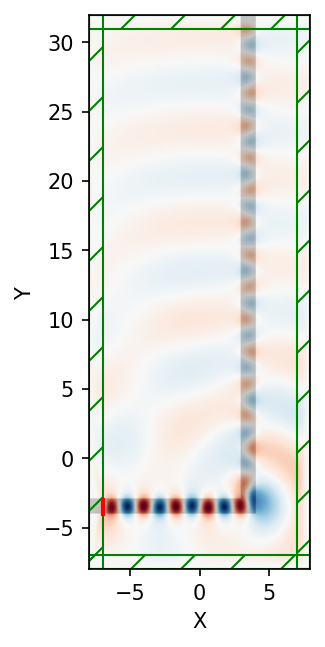

In [16]:
sim.reset_meep()
cell = mp.Vector3(16,40,0)
geometry = [
    mp.Block(
        mp.Vector3(12, 1, mp.inf),
        center=mp.Vector3(-2.5, -3.5),
        material = mp.Medium(epsilon=12),
    ),
    mp.Block(mp.Vector3(1, 42, mp.inf),
             center = mp.Vector3(3.5,17),
             material = mp.Medium(epsilon=12),
            ),
]

sim.cell_size = cell
sim.geometry = geometry
sim.geometry_center = mp.Vector3(0,12,0)

sim.run(until=400)
plt.figure(dpi=150)
sim.plot2D(fields=mp.Ez)
plt.show()



-----------
Initializing structure...
time for choose_chunkdivision = 0.000141144 s
Working in 2D dimensions.
Computational cell is 16 x 40 x 0 with resolution 10
     block, center = (-2.5,-3.5,0)
          size (12,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
     block, center = (3.5,17,0)
          size (1,42,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (12,12,12)
time for set_epsilon = 0.074672 s
-----------
creating output file "./eps-000000.00.h5"...
run 2 finished at t = 200.0 (4000 timesteps)


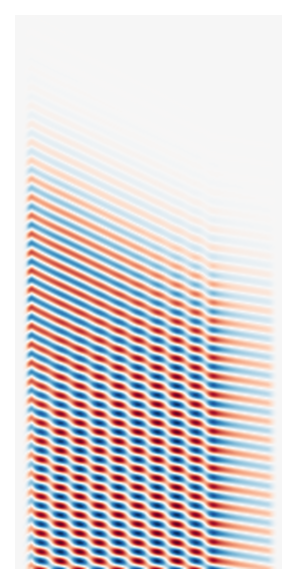

In [17]:
vals = []

def get_slice(sim):
    vals.append(
        sim.get_array(
            center=mp.Vector3(0, -3.5), size = mp.Vector3(16,0), component=mp.Ez
        )
    )
sim.reset_meep()
sim.run(mp.at_beginning(mp.output_epsilon), mp.at_every(0.6, get_slice), until=200)

plt.figure(dpi=150)
plt.imshow(vals, interpolation="spline36", cmap="RdBu")
plt.axis("off")
plt.show()